<a href="https://colab.research.google.com/github/maryamdarei/CNN/blob/main/NewCNN_WithPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Herbarium Data-2019


/content/drive/MyDrive/Herbarium Data-2019


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Dec  7 20:45:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# CNN Model With PyTorch For Image Classification
# Load in relevant libraries, and alias where appropriate

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from PIL import Image
import sys
import os
import glob
import cv2

from torch.utils import data
from torchvision.models import vgg19
from torchvision import transforms
from torchvision import datasets
import numpy as np

In [ ]:
# Data Augmentation:
# flip horizontally and vertically, Resize to 128X128
imageSize = 256
print(torch.cuda.is_available())
def main():
    path_of_the_directory = "/content/drive/MyDrive/Herbarium Data-2019/small-train"
    for filename in os.listdir(path_of_the_directory):
        img_dir = os.path.join(path_of_the_directory, filename)
        jpg_ext = ".jpg"
        path = "/content/drive/MyDrive/Herbarium Data-2019/small-train"
        angles = [0]
        for file_name in glob.iglob(os.path.join(img_dir, "*" + jpg_ext)):
            original_img = Image.open(file_name)
            new_image = original_img.resize((imageSize, imageSize))
            for angel in angles:
                rot_suffix = "_r{:03d}{:s}".format(angel, jpg_ext)
                file_name_rot = file_name.replace(jpg_ext, rot_suffix)
                vertical_img = new_image.transpose(method=Image.FLIP_TOP_BOTTOM)
                vertical_img.save(file_name_rot)
                print("Rotated: {:s} by {:3d} degrees to {:s}".format(file_name, angel, file_name_rot))

        angles = [1]
        for file_name in glob.iglob(os.path.join(img_dir, "*" + jpg_ext)):
            original_img = Image.open(file_name)
            new_image = original_img.resize((imageSize, imageSize))
            for angel in angles:
                rot_suffix = "_r{:03d}{:s}".format(angel, jpg_ext)
                file_name_rot = file_name.replace(jpg_ext, rot_suffix)
                horz_img = new_image.transpose(method=Image.FLIP_LEFT_RIGHT)
                horz_img.save(file_name_rot)
                print("Rotated: {:s} by {:3d} degrees to {:s}".format(file_name, angel, file_name_rot))


if __name__ == "__main__":
    print("Python {:s} on {:s}\n".format(sys.version, sys.platform))
    main()
    print("\nDone.")


# Rotate 90 and 270:


def main():
    path_of_the_directory = "/content/drive/MyDrive/Herbarium Data-2019/small-train"
    for filename in os.listdir(path_of_the_directory):
        img_dir = os.path.join(path_of_the_directory, filename)
        jpg_ext = ".jpg"
        angles = [90]
        for file_name in glob.iglob(os.path.join(img_dir, "*" + jpg_ext)):
            # image = Image.open(file_name)
            original_img = Image.open(file_name)
            new_image = original_img.resize((imageSize, imageSize))
            for angle in angles:
                rot_suffix = "_r{:03d}{:s}".format(angle, jpg_ext)
                file_name_rot = file_name.replace(jpg_ext, rot_suffix)
                image_rot = new_image.rotate(angle)
                image_rot.save(file_name_rot)
                print("Rotated: {:s} by {:3d} degrees to {:s}".format(file_name, angle, file_name_rot))


if __name__ == "__main__":
    print("Python {:s} on {:s}\n".format(sys.version, sys.platform))
    main()
    print("\nDone.")    


In [21]:
# Transform Data:
# Define relevant variables for the ML task
batch_size = 64
num_classes = 683
learning_rate = 0.001
num_epochs = 2
imageSize = 150


# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#train and test data directory
data_dir = "/content/drive/MyDrive/Herbarium Data-2019/small-train"
test_data_dir = "/content/drive/MyDrive/Herbarium Data-2019/small-validation"



#load the train and test data
train_dataset = ImageFolder(data_dir,transforms.Compose([
transforms.Resize((imageSize,imageSize)),transforms.ToTensor()
]))

test_dataset = ImageFolder(test_data_dir,transforms.Compose([
transforms.Resize((imageSize,imageSize)),transforms.ToTensor()
]))

img, label = train_dataset[0]
print(img.shape,label)




torch.Size([3, 150, 150]) 0


Label : 0
Length of Train Data : 34225
Length of Validation Data : 2679


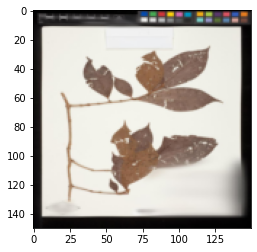

In [26]:
#Display Image, Splitting Data and Prepare Batches:
def display_img(img,label):
    print(f"Label : {train_dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*train_dataset[2])

# Splitting Data and Prepare Batches:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

batch_size = 128
val_size = len(test_dataset)
train_size = len(train_dataset) - val_size

train_data,val_data = random_split(train_dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_dataset)}")
print(f"Length of Validation Data : {len(val_data)}")

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)


In [39]:
train_dataset
#label.to(device)

Dataset ImageFolder
    Number of datapoints: 34225
    Root location: /content/drive/MyDrive/Herbarium Data-2019/small-train
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

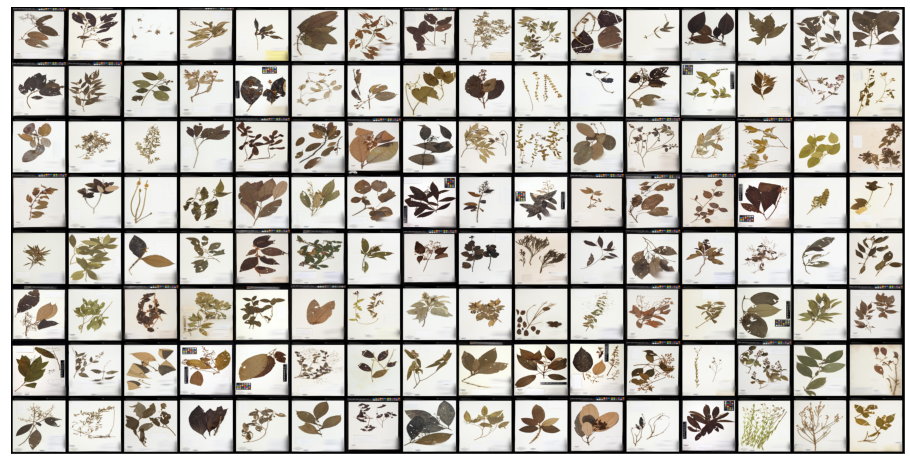

In [6]:
#Visualizing the images:

from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)


In [32]:
#Model For Image Classification:

import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))


In [33]:
#CNN Model For Classification:

class NaturalSceneClassification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(82944,1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512,6)
        )
        
    
    def forward(self, xb):
        return self.network(xb)

In [34]:
#Hyperparameters, Model Training, And Evaluation:

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

  
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

  
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    
    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

In [43]:
# train the model
total_step = len(train_dl)
model = NaturalSceneClassification()

#model = ConvNeuralNet(num_classes)
model.to(device)

num_epochs = 20
opt_func = torch.optim.Adam
#ceriterion= torch.nn.CrossEntropyLoss()
lr = 0.001
#fitting the model on training data and record the result after each epoch
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

AttributeError: ignored

In [ ]:
#Plotting the graph

def plot_accuracies(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    

plot_accuracies(history)


In [ ]:
def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)
